# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image 데이터들을 Network(모델)에 배치단위로 제공
    - 다양한 Image Augmentation(이미지 증식) 기능을 제공
        - Data제공 파이프라인에 Image Augmentation을 쉽게 적용 가능
- 전체 데이터를 한번 다 제공하더라도 계속 요청하면 반복 제공

## ImageDataGenerator()
- tensorflow.keras.preprocessing.image.ImageDataGenerator
    - Image 제공 데이터 파이프라인을 어떻게 만들지 설정
- **매개변수**: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들로 채움
        - constant: 지정한 값으로 채움, 기본은 0, 특정값으로 채울 때는 cval = 100으로 설정
    - **Nomalization 설정**
        - **rescale**: 지정한 값을 각 픽셀에 곱함
        - **featurewise_center = True**: channel의 평균을 pixel에서 빼서 평균 0으로 표준화(channel 별로 처리)
        - **featurewise_std_nomalization = True**: channel 별로 표준화(평균 0, 표준편차 1)
    - **반전**
        - **horizontal_flip = True**: 좌우반전, **vertical_flip = True**: 상하 반전
    - **회전(rotation)**
        - **rotation_range = 정수**: -정수 ~ +정수 범위로 랜덤 회전(rotation_rate = 30: -30 ~ +30도 사이에서 랜덤하게 회전)
    - **이동**
        - **width_shift_range = 실수**: 좌우이동, **height_shift_range = 실수**: 상하이동
        - 실수값: 이동범위 지정. 0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1 이상이면 pixel
        - 정수: [-정수, 0, +정수] 범위
    - **Zoom**
        - **zoom_range**: 실수 또는 [lower, upper]
            - 실수: [1-실수값, 1+실수값]
            - 리스트: 원하는 비율로 lower, upper 지정할 때 설정할 값이 1 미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - **shear(전단변환)**: 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - **명암(brightness)**
        - **brightness_range**: 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보다 크면 밝아짐
- **flow 메소드들**
    - ImageDataGenerator에 Image Data를 연결하여 batch 단위로 공급하는 Iterator 생성
    - Raw Image data의 위치에 따라 다양한 메소드를 제공

## ImageDataGenerator에 dataset을 제공하는 메소드
- ### flow_from_directory()
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성
    - 주요 매개변수
        - directory: 이미지 저장 경로(이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되어 있어야 한다. 오름차순으로 Label이 생성)
        - target_size: 이미지 크기, 지정한 크기로 resize한다. 기본값: (256, 256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값:(256, 256)
        - class_mode: 분류 종류 지정
            - 'binary': binary class 분류
            - 'category': multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse': multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위 다렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
    
    ![image](https://miro.medium.com/v2/resize:fit:610/format:webp/1*9AwLsVWEA1rTJmd2fE2_Nw.png)
    - **Directory 이름을 class name으로 한다**
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256, 256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary': binary class 분류
            - 'category': multi class 분류. label(output)이 one hot encoding된 경우 지정
            - 'sparse': multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값, 하위 디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정(기본: 32)

- ### flow()
    - ndarray 타입의 이미지를 받아서 처리
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels
        - batch_size: 미니 배치 크기(기본값: 32)
### `모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다`

## 코드

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<class 'PIL.JpegImagePlugin.JpegImageFile'>


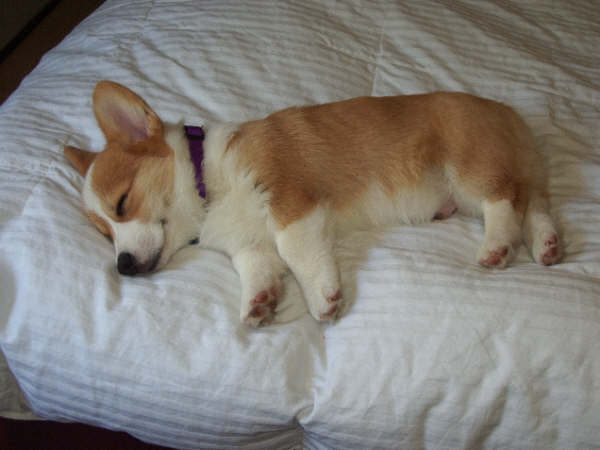

In [3]:
img = load_img('test_img/image.jpg')
print(type(img))
img

In [4]:
# 이미지를 ndarray로 변환
data = img_to_array(img)
print(type(data), data.shape)
# batch 축 추가
sample = data[np.newaxis, ...]
sample.shape

<class 'numpy.ndarray'> (450, 600, 3)


(1, 450, 600, 3)

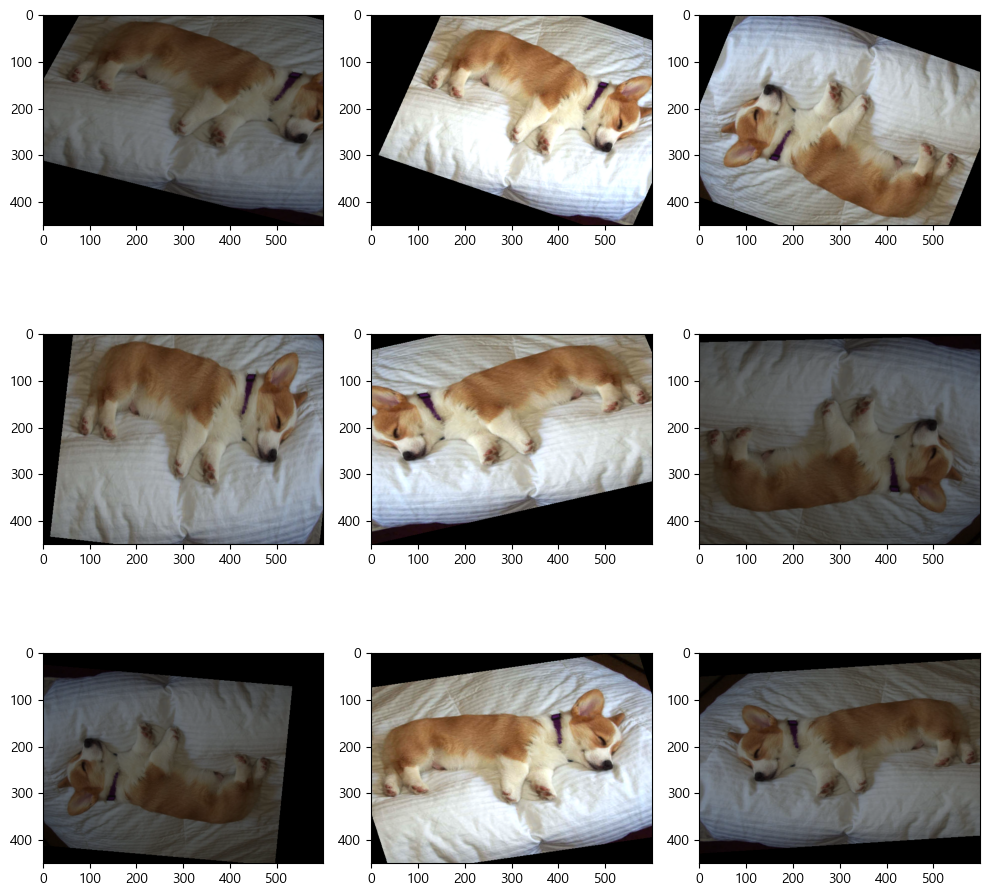

In [5]:
img = load_img('test_img/image.jpg')
data = img_to_array(img)
sample = data[np.newaxis, ...]

datagen = ImageDataGenerator(
    rotation_range = 20, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    zoom_range = 0.2,
    brightness_range = (0.5, 1.5),
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 5,
    fill_mode = 'constant'
)

fig = plt.figure(figsize = (10, 10))
iterator = datagen.flow(sample, batch_size = 1)

for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(iterator)
    img = batch[0].astype('uint8')
    plt.imshow(img)
    
plt.tight_layout()
plt.show()